In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cpk_output.csv')

In [3]:
df.head()

,block_id,zhat,sig,is_weighted_by_point_support,use_all_neighbors_in_range,number_of_neighbors,neighbors_range,real
0,25019,110.752662,3.707956,True,True,8,180000,192.2
1,25019,109.514612,3.033792,True,False,8,180000,192.2
2,25019,112.105295,3.973497,True,True,8,240000,192.2
3,25019,109.514612,3.033792,True,False,8,240000,192.2
4,25019,114.882277,4.618379,True,True,8,400000,192.2


In [4]:
df['mae'] = abs(df['real'] - df['zhat'])

In [5]:
df[['zhat', 'real']].describe()

,zhat,real
count,3900.000000,7812.000000
mean,130.247845,131.571429
std,14.179620,13.087959
min,89.140422,98.100000
25%,120.542984,122.100000
50%,131.262477,131.700000
75%,141.025009,141.000000
max,163.329079,192.200000


In [6]:
df['sig'].describe()

count    3831.000000
mean       10.317444
std         3.712706
min         1.307001
25%         8.157637
50%         9.700362
75%        11.727775
max        27.158858
Name: sig, dtype: float64

In [7]:
grouped_errors = df.groupby("number_of_neighbors")["mae"].mean()

In [8]:
grouped_errors

number_of_neighbors
8     16.737169
16    16.743107
32    16.961731
Name: mae, dtype: float64

In [9]:
grouped_errors = df.groupby(["number_of_neighbors", "use_all_neighbors_in_range"])["mae"].mean()
grouped_errors

number_of_neighbors  use_all_neighbors_in_range
8                    False                         15.609206
                     True                          17.865133
16                   False                         15.621082
                     True                          17.865133
32                   False                         16.058329
                     True                          17.865133
Name: mae, dtype: float64

In [41]:
df = df[(df['number_of_neighbors'] == 8) & (df['use_all_neighbors_in_range'] == False)]
len(df)

1302

In [42]:
df.head()

,block_id,zhat,sig,is_weighted_by_point_support,use_all_neighbors_in_range,number_of_neighbors,neighbors_range,real,mae
1,25019,109.514612,3.033792,True,False,8,180000,192.2,82.685388
3,25019,109.514612,3.033792,True,False,8,240000,192.2,82.685388
5,25019,109.514612,3.033792,True,False,8,400000,192.2,82.685388
19,25019,NaN,NaN,False,False,8,180000,192.2,NaN
21,25019,NaN,NaN,False,False,8,240000,192.2,NaN


In [43]:
df[df['is_weighted_by_point_support'] == False]

,block_id,zhat,sig,is_weighted_by_point_support,use_all_neighbors_in_range,number_of_neighbors,neighbors_range,real,mae
19,25019,NaN,NaN,False,False,8,180000,192.2,NaN
21,25019,NaN,NaN,False,False,8,240000,192.2,NaN
23,25019,NaN,NaN,False,False,8,400000,192.2,NaN
55,36121,NaN,NaN,False,False,8,180000,166.8,NaN
57,36121,NaN,NaN,False,False,8,240000,166.8,NaN
...,...,...,...,...,...,...,...,...,...
7761,42105,NaN,NaN,False,False,8,240000,100.6,NaN
7763,42105,NaN,NaN,False,False,8,400000,100.6,NaN
7795,36033,NaN,NaN,False,False,8,180000,98.1,NaN
7797,36033,NaN,NaN,False,False,8,240000,98.1,NaN


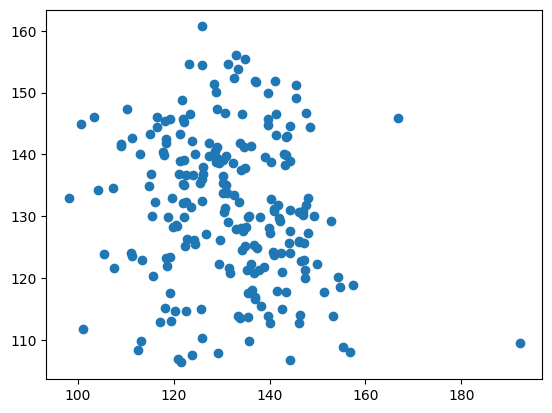

In [17]:
plt.figure()
plt.scatter(x=df['real'], y=df['zhat'])
plt.show()

In [18]:
df['mae'].describe()

count    217.000000
mean      15.567646
std       11.255397
min        0.227540
25%        6.683407
50%       13.798832
75%       21.842380
max       82.685388
Name: mae, dtype: float64

In [22]:
df['error-class'] = pd.cut(df['mae'], 5, labels=[1, 2, 3, 4, 5])

<Axes: xlabel='real', ylabel='zhat'>

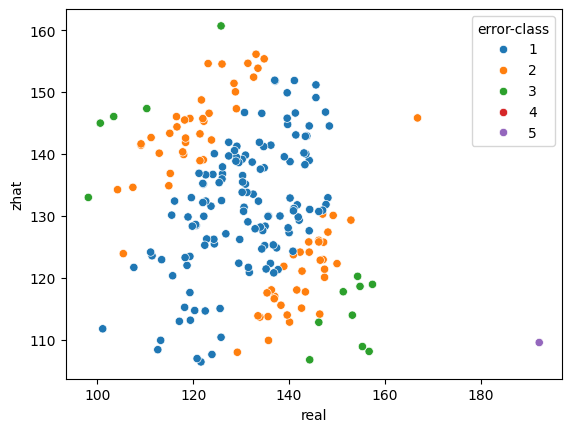

In [23]:
sns.scatterplot(x=df['real'], y=df['zhat'], hue=df['error-class'])

In [24]:
df['sigma-class'] = pd.cut(df['sig'], bins=5, labels=[1, 2, 3, 4, 5])

<Axes: xlabel='real', ylabel='zhat'>

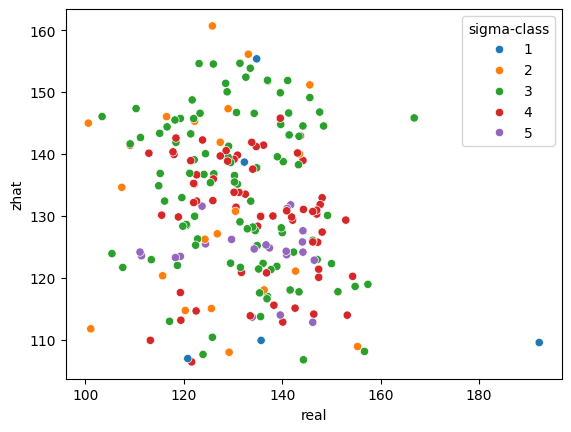

In [25]:
sns.scatterplot(x=df['real'], y=df['zhat'], hue=df['sigma-class'])

In [28]:
df[['zhat', 'real', 'mae', 'sig']].corr(numeric_only=True)

,zhat,real,mae,sig
zhat,1.000000,-0.152674,-0.091749,-0.125211
real,-0.152674,1.000000,0.146301,0.070698
mae,-0.091749,0.146301,1.000000,-0.160590
sig,-0.125211,0.070698,-0.160590,1.000000


<Axes: >

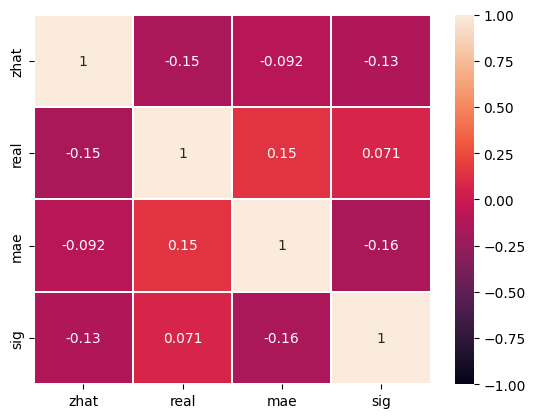

In [31]:
sns.heatmap(df[['zhat', 'real', 'mae', 'sig']].corr(numeric_only=True), annot=True, linewidths=0.1, vmin=-1, vmax=1)